# Lecture 3 Machine Learning

Artificial Intelligence (AI) recreats a human-like being in a machine. Alan Turing proposed the so-called Turing test in 1950. The test verifies if the machine can mimic human intelligence.
- Although it seems simple, none has really passed Turing test yet.
- Many complicated and well-defined variants have been proposed.

Machine Learning (ML) can be seen as a subfield of AI, focusing on studying the methods that can be used to improve the performance of an intelligent agent over time.


## 3.1 Intro - Basic Classification Model

We will create a basic classification model using the Iris dataset. This dataset contains features like petal length and width, and sepal length and width of iris flowers, and the goal is to classify them into different species.

Steps:
- Load the Iris dataset.
- Split the dataset into training and testing sets.
- Train a classifier (e.g., Decision Tree Classifier).
- Evaluate the model's performance.

Note: A Decision Tree Classifier is a popular machine learning algorithm used for classification tasks. It is a flowchart-like structure where each internal node represents a decision based on an attribute, each branch represents the outcome of the decision, and each leaf node represents a class label or a continuous value.

In this example, the decision tree classifier tries to find the best way to split the data at each step based on the features (like sepal length, petal length, etc.). It looks for splits that maximize the separation of the species. The "best" split is determined by a metric called Entropy for information gain. A low Entropy value indicates that the data in that split is homogeneous, which is desired in classification.

For example, the tree might look something like this:

            (Petal Length <= 2.45)
            /           \
      (Setosa)      (Petal Length > 2.45)
                          /      \
              (Petal Width <= 1.75)  (Versicolor or Virginica)
                         /     \
                  (Virginica)  (Versicolor)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

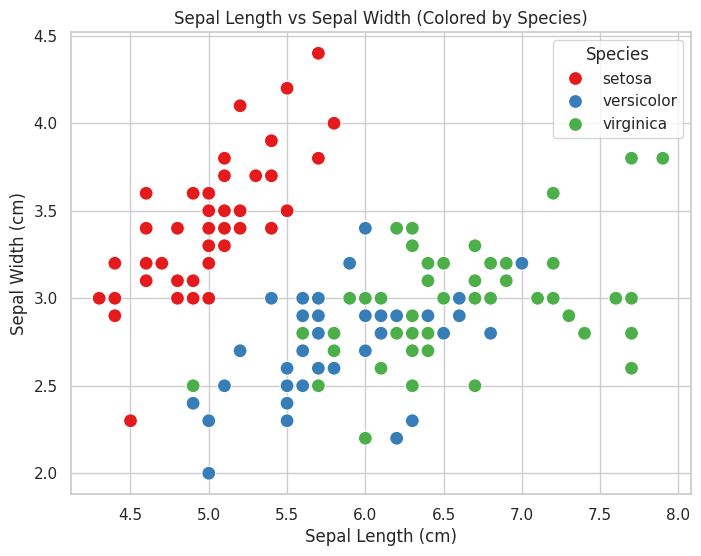

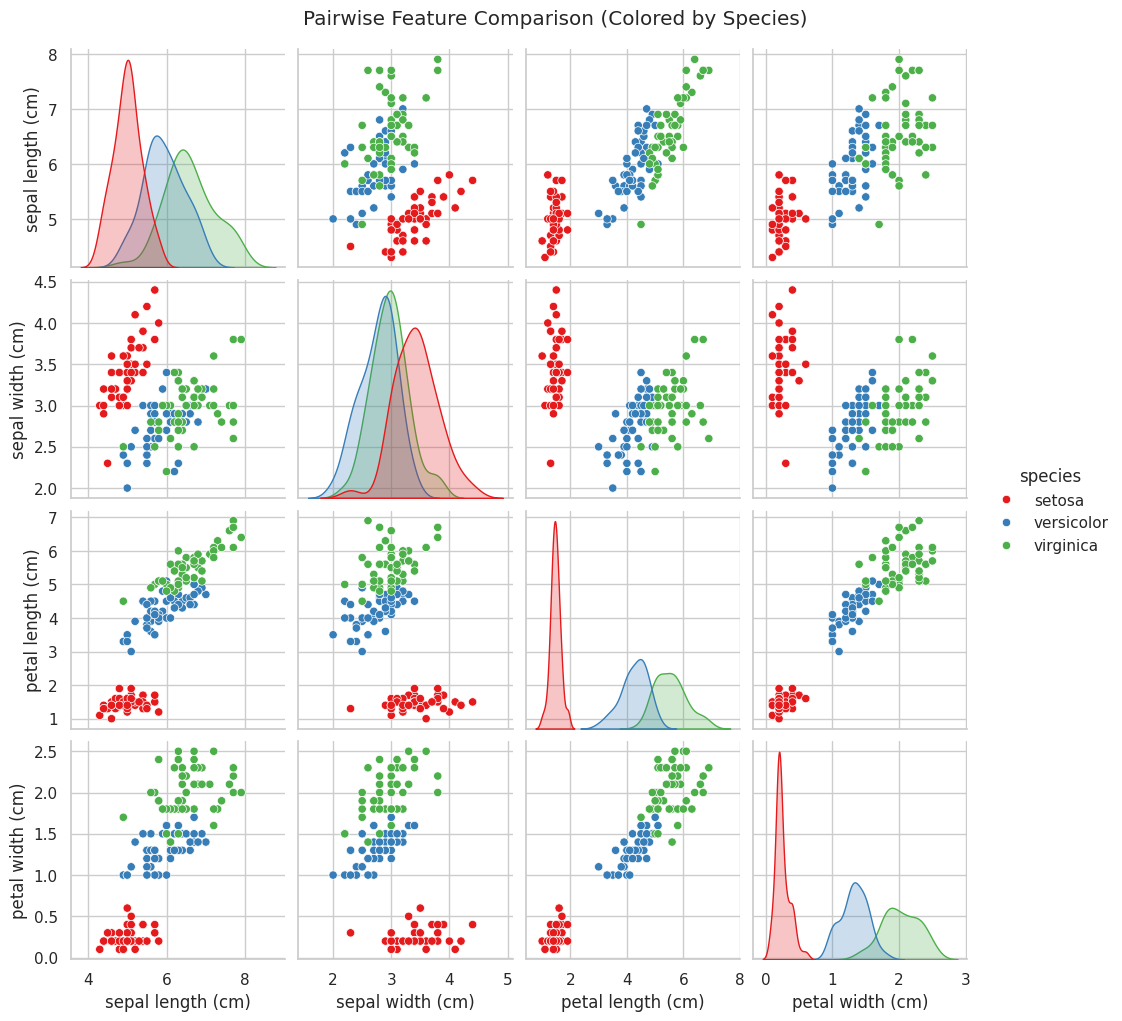

In [ ]:
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (0 = setosa, 1 = versicolor, 2 = virginica)


# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = iris.target_names[y]
sns.set(style="whitegrid")

# Scatter Plot - Sepal Length vs Sepal Width, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1', s=100)
plt.title('Sepal Length vs Sepal Width (Colored by Species)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

# Pair Plot - Pairwise comparison of all features, colored by species
sns.pairplot(iris_df, hue='species', palette='Set1')
plt.suptitle('Pairwise Feature Comparison (Colored by Species)', y=1.02)
plt.show()

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 100.00%


The last step is visualizing the results.

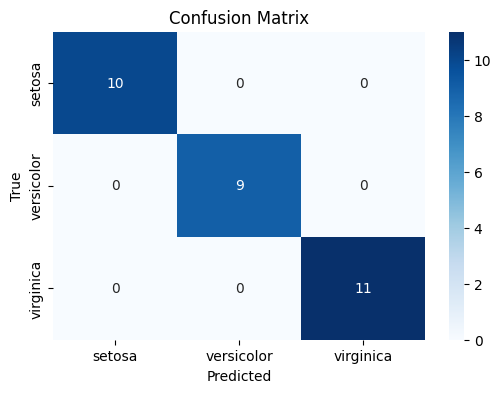

<ipython-input-9-b5f98effec01>:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_2D, s=50, edgecolor="k", cmap="coolwarm", marker='x', label="Test data")


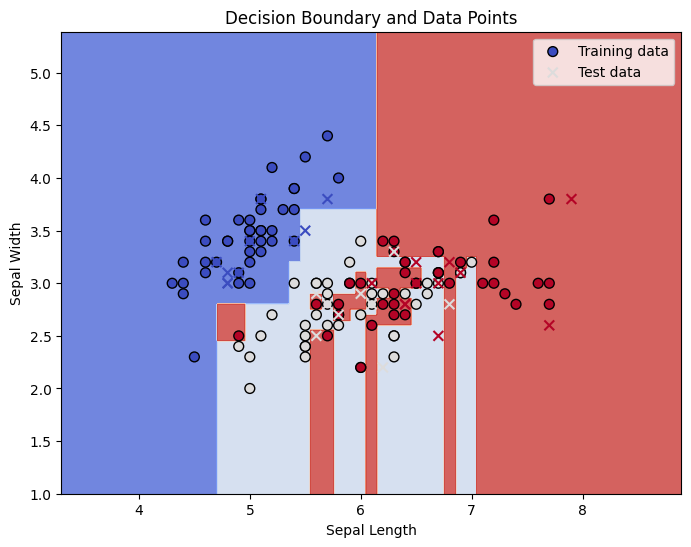

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize decision boundaries (only using 2 features: sepal length and sepal width for simplicity)
X_2D = X[:, :2]  # Only using the first two features: sepal length and sepal width
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D, y, test_size=0.2, random_state=42)

model_2D = DecisionTreeClassifier(random_state=42)
model_2D.fit(X_train_2D, y_train_2D)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the grid
Z = model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train_2D, s=50, edgecolor="k", cmap="coolwarm", marker='o', label="Training data")
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_2D, s=50, edgecolor="k", cmap="coolwarm", marker='x', label="Test data")

plt.title("Decision Boundary and Data Points")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc="best")
plt.show()


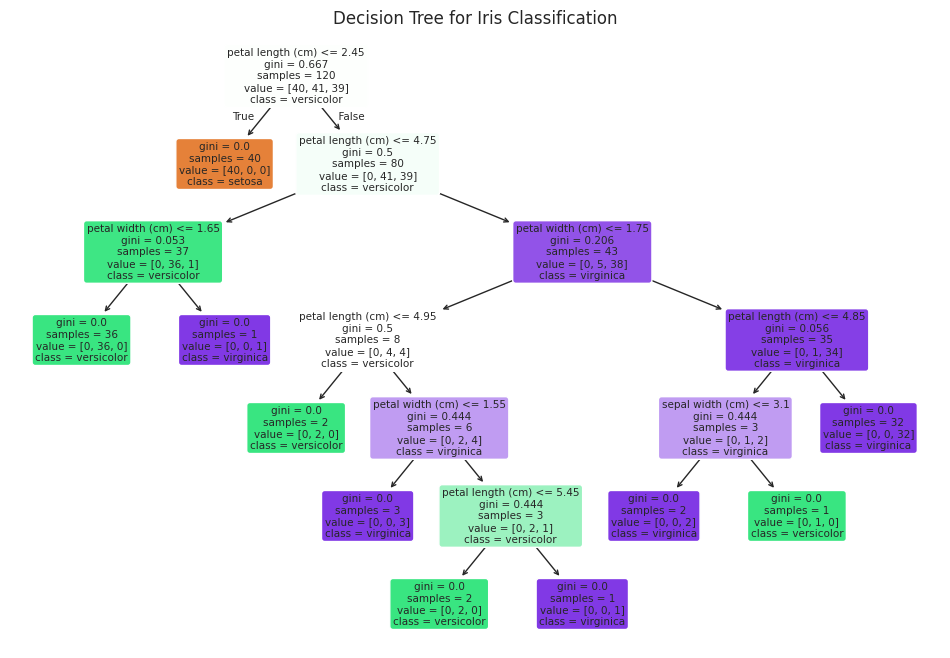

In [ ]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title('Decision Tree for Iris Classification')
plt.show()

## 3.2 Intro - Big Data

When working with big data, we need to take into account factors like performance, memory management, and efficient processing. Scikit-learn and pandas may not be sufficient for very large datasets, especially if they don’t fit into memory. In such cases, you might want to consider using tools like Dask, PySpark, or H2O.ai, which are designed for distributed computing.

Simulate a large dataset using Dask and build a simple machine learning model.

Steps:
- Install Dask: Use Dask's dask-ml for machine learning tasks.
- Simulate Big Data: Simulate a large dataset using Dask.
- Build a Machine Learning Model: Use Dask-ML to train a model.
- Evaluate the Model: Check the model's performance.

In [ ]:
pip install dask[complete] dask-ml xgboost

In [ ]:
import dask.dataframe as dd
import dask_ml.model_selection as dcv
import xgboost as xgb
from dask.distributed import Client
from sklearn.datasets import make_classification
from dask_ml.metrics import accuracy_score
import time

# Start a Dask client for parallel computation
client = Client()

# Simulate a large dataset with 1 million samples and 50 features
n_samples = 100000  # 1 million samples
n_features = 50       # 50 features
X, y = make_classification(n_samples=n_samples, n_features=n_features, random_state=42)

# Convert the NumPy arrays to Dask DataFrames
X_dd = dd.from_array(X, columns=[f'feature_{i}' for i in range(n_features)])
y_dd = dd.from_array(y, columns=['target'])

# Combine features and target into a single Dask DataFrame (optional for viewing)
df = dd.concat([X_dd, y_dd], axis=1)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = dcv.train_test_split(X_dd, y_dd, test_size=0.2, random_state=42)

# Convert Dask DataFrames to Dask Arrays for XGBoost
X_train_dask = X_train.to_dask_array(lengths=True)
X_test_dask = X_test.to_dask_array(lengths=True)
y_train_dask = y_train.to_dask_array(lengths=True)
y_test_dask = y_test.to_dask_array(lengths=True)

# Initialize XGBoost model
dtrain = xgb.dask.DaskDMatrix(client, X_train_dask, label=y_train_dask)
dtest = xgb.dask.DaskDMatrix(client, X_test_dask, label=y_test_dask)

# Set up parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Logarithmic loss for evaluation
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Training the model
start_time = time.time()

# Train the model using Dask's distributed computation
output = xgb.dask.train(client, params, dtrain, num_boost_round=100)

# End the timer for training
end_time = time.time()
print(f"Training took {end_time - start_time:.2f} seconds.")

# Get the model from the output
booster = output['booster']

# Make predictions on the test data
preds = xgb.dask.predict(client, booster, dtest)

# Convert Dask Array back to NumPy for evaluation
preds_np = preds.compute()
y_test_np = y_test_dask.compute()


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-4biz9rx6', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-4a8iit_j', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-wypeo_eh', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-vnvqdja9', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/scheduler-duodic7y', purging
INFO:distributed.diskutils:Found stale lock file and directory '/tmp/dask-scratch-space/worker-19olpyqm', purging
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34119
INFO:distributed.scheduler:  dashboard at:  http://

Training took 10.43 seconds.


In [ ]:
import numpy as np


# Check the format (type and shape)
print(f"Type of y_test_np: {type(y_test_np)}")
print(f"Shape of y_test_np: {y_test_np.shape}")

print(f"Type of preds_np: {type(preds_np)}")
print(f"Shape of preds_np: {preds_np.shape}")

y_test_np_flat = y_test_np.flatten()

preds_binary = (preds_np > 0.5).astype(int)


print(preds_binary[:10])
print(y_test_np_flat[:10])

Type of y_test_np: <class 'numpy.ndarray'>
Shape of y_test_np: (19989, 1)
Type of preds_np: <class 'numpy.ndarray'>
Shape of preds_np: (19989,)
[1 1 0 1 0 1 0 0 1 1]
[1 1 0 1 0 1 0 0 1 0]


In [ ]:
accuracy = accuracy_score(y_test_np_flat, preds_binary)

# Compute the result (Dask will parallelize the calculation)
print(accuracy)

# Close the Dask client after use
client.close()


0.8771324228325579
